### Note

This notebook reflects an exploratory learning approach to understanding how
different machine learning models behave on credit risk data. The focus is on
studying modeling choices and evaluation trade-offs rather than building a
production-ready system.


In [ ]:



import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("GermanCreditData.csv")
df.head()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


In [ ]:
X = df.drop("credit_risk", axis=1)
y = df["credit_risk"]

X.shape, y.shape


((1000, 20), (1000,))

In [ ]:
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

categorical_cols, numerical_cols


(Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
        'personal_status_sex', 'other_debtors', 'property',
        'other_installment_plans', 'housing', 'job', 'telephone',
        'foreign_worker'],
       dtype='object'),
 Index(['duration', 'amount', 'installment_rate', 'present_residence', 'age',
        'number_credits', 'people_liable'],
       dtype='object'))

In [ ]:
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Logistic Regression


In [ ]:
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42
)


In [ ]:
lr_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

### Evaluation Choice

In credit risk assessment, different types of errors have unequal consequences.
Rather than relying on accuracy alone, multiple evaluation metrics are used to
observe how model behaviour changes under different perspectives.

In [ ]:
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_prob_lr)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression ROC-AUC:", lr_roc_auc)
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.71
Logistic Regression ROC-AUC: 0.7514285714285714
              precision    recall  f1-score   support

           0       0.52      0.47      0.49        60
           1       0.78      0.81      0.80       140

    accuracy                           0.71       200
   macro avg       0.65      0.64      0.64       200
weighted avg       0.70      0.71      0.71       200



Random Forest

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)


In [ ]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]



In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_prob_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest ROC-AUC:", rf_roc_auc)
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.72
Random Forest ROC-AUC: 0.7469642857142856
              precision    recall  f1-score   support

           0       0.55      0.37      0.44        60
           1       0.76      0.87      0.81       140

    accuracy                           0.72       200
   macro avg       0.66      0.62      0.63       200
weighted avg       0.70      0.72      0.70       200



### Feature Importance Analysis

Feature importance from the Random Forest model is inspected to gain insight into
which attributes most strongly influence predictions. This step was included to
improve transparency and better understand model behaviour.


In [ ]:

rf_feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

rf_feature_importance.head(10)



,0
amount,0.114288
duration,0.093415
age,0.086595
status_no checking account,0.066088
installment_rate,0.040009
present_residence,0.039763
purpose_car (new),0.023792
credit_history_critical account/other credits existing,0.021495
personal_status_sex_male : single,0.021399
other_installment_plans_none,0.021372


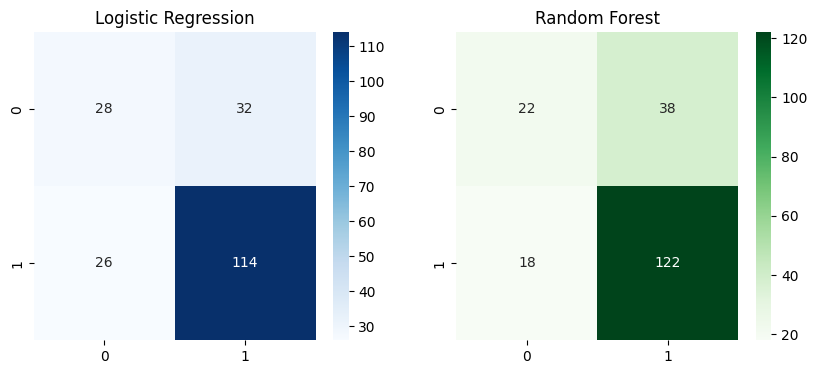

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression")

plt.subplot(1,2,2)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest")

plt.show()


In [ ]:
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [lr_accuracy, rf_accuracy],
    "ROC-AUC": [lr_roc_auc, rf_roc_auc]
})

comparison_df


,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.71,0.751429
1,Random Forest,0.72,0.746964


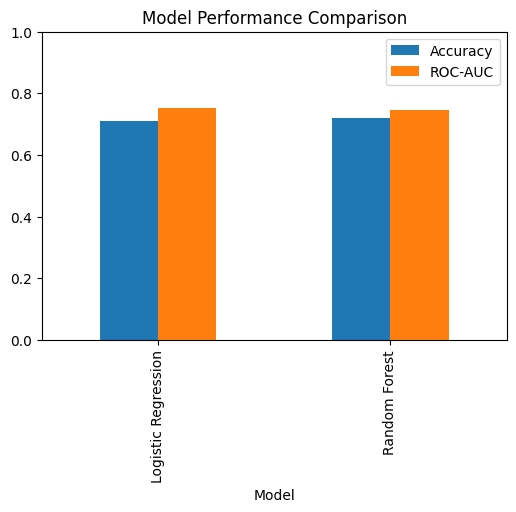

In [ ]:
comparison_df.set_index("Model").plot(kind="bar", figsize=(6,4))
plt.ylim(0,1)
plt.title("Model Performance Comparison")
plt.show()


### Limitations

This implementation assumes static borrower behaviour and does not capture
temporal changes in credit patterns. Additionally, no extensive hyperparameter
tuning was performed, as the primary goal was to understand baseline model
behaviour.
